In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [104]:
data = pd.read_excel('Data Analyst Assignment (1).xlsx', index_col=0)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16834 entries, 2019-10-16 to 2020-07-07
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product               16834 non-null  object 
 1   phase                 16834 non-null  object 
 2   campaign_platform     16834 non-null  object 
 3   campaign_type         16834 non-null  object 
 4   communication_medium  16834 non-null  object 
 5   subchannel            16834 non-null  object 
 6   audience_type         16834 non-null  object 
 7   creative_type         16834 non-null  object 
 8   creative_name         16834 non-null  object 
 9   device                16834 non-null  object 
 10  age                   16834 non-null  object 
 11  spends                16834 non-null  float64
 12  impressions           16834 non-null  int64  
 13  clicks                16834 non-null  int64  
 14  link_clicks           16288 non-null  float64
dtypes:

In [106]:
data.duplicated().sum()

3570

In [107]:
data.head(-5)

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
Date,,,,,,,,,,,,,,,
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,3.04,4,3,0.0
2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,1.35,6,3,0.0
2020-07-07,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,3.50,3,1,0.0


In [108]:
data.columns

Index(['product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [109]:
data.iloc[:,8:].describe().style.background_gradient(cmap = 'copper')

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


#### there is a problem with spends,impression,clicks, for eg:- i notices the minumum and maximum spends are 0.0, and 9221.9600 respectively. i will deal with this very soon.

## understanding the discrete variables

In [110]:
data.age.unique()

array(['18-24', '25-34', '35-44', 'Undetermined', '45-54', '55-64',
       '65 or more'], dtype=object)

In [111]:
data.device.unique()

array(['Desktop', 'Mobile', 'Tablet', 'device'], dtype=object)

In [112]:
unique_count=data.nunique()
print(unique_count)

product                    1
phase                      1
campaign_platform          2
campaign_type              2
communication_medium       2
subchannel                 4
audience_type              4
creative_type              3
creative_name              4
device                     4
age                        7
spends                  9087
impressions             1188
clicks                   263
link_clicks              160
dtype: int64


#### as we can observe we have to gather insights for the same products with same phase.

In [113]:
data = data.drop(['product','phase'],axis=1)

In [114]:
data_copy = data.copy()


In [115]:
data_copy

,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
Date,,,,,,,,,,,,,
2019-10-16,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
2019-10-16,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2019-10-16,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
2019-10-16,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
2019-10-18,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-07,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,25-34,19.88,36,15,0.0
2020-07-07,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,35-44,1.64,11,1,0.0
2020-07-07,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Mobile,45-54,0.00,3,0,0.0


##### device vs clicks

In [116]:
pd.crosstab(data['device'],data['clicks']).sort_values(1,0,ascending=False).head(10)

clicks,0,1,2,3,4,5,6,7,8,9,...,861,866,868,880,899,902,924,978,1025,1075
device,,,,,,,,,,,,,,,,,,,,,
Desktop,1776,1309,785,506,321,273,175,113,85,93,...,0,0,0,0,0,0,0,0,0,0
Mobile,1252,1013,678,514,372,365,262,228,183,169,...,0,0,0,0,0,0,0,0,0,0
Tablet,1069,299,41,11,4,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
device,433,200,101,88,62,43,36,45,24,33,...,1,1,1,1,1,1,1,1,1,1


In [117]:
for i in data.columns:
    print("               %s           "%i)
    print('-----------------------------------')
    print(data[i].value_counts())

               campaign_platform           
-----------------------------------
Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64
               campaign_type           
-----------------------------------
Search         15101
Conversions     1733
Name: campaign_type, dtype: int64
               communication_medium           
-----------------------------------
Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64
               subchannel           
-----------------------------------
Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64
               audience_type           
-----------------------------------
'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64
               creative_type           
-----------------------------------
'-          15101
Image        1130
Carousal      603
Name

#### observing the communication medium and campaign type are same for the same camapign_platform 

In [118]:
grouped_multiple = data.groupby(['campaign_platform','communication_medium']).agg({'age':['count']})
grouped_multiple.columns = ['X']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

  campaign_platform communication_medium      X
0      Facebook Ads             Creative   1733
1        Google Ads      Search Keywords  15101


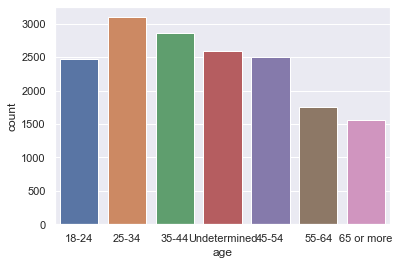

In [119]:
sns.set(style='darkgrid')
sns.countplot(data.age)


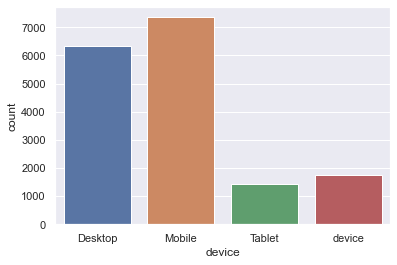

In [120]:
sns.countplot(data.device)

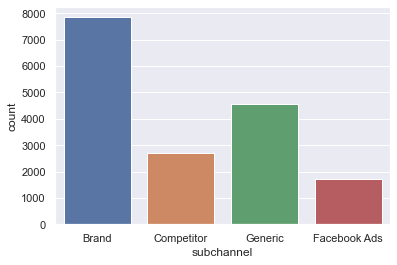

In [121]:
sns.countplot(data.subchannel)

In [122]:
#data["age"] = pd.to_numeric(data["age"], downcast="float")

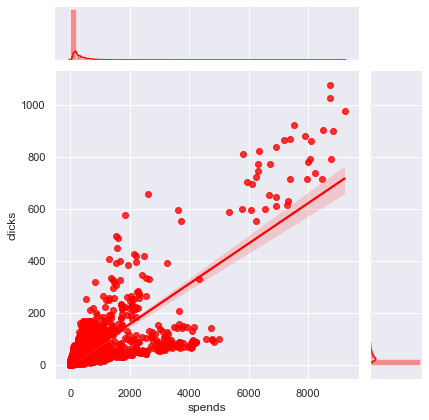

In [123]:
sns.jointplot(x="spends",y = 'clicks',data= data_copy,color='red',kind='reg')


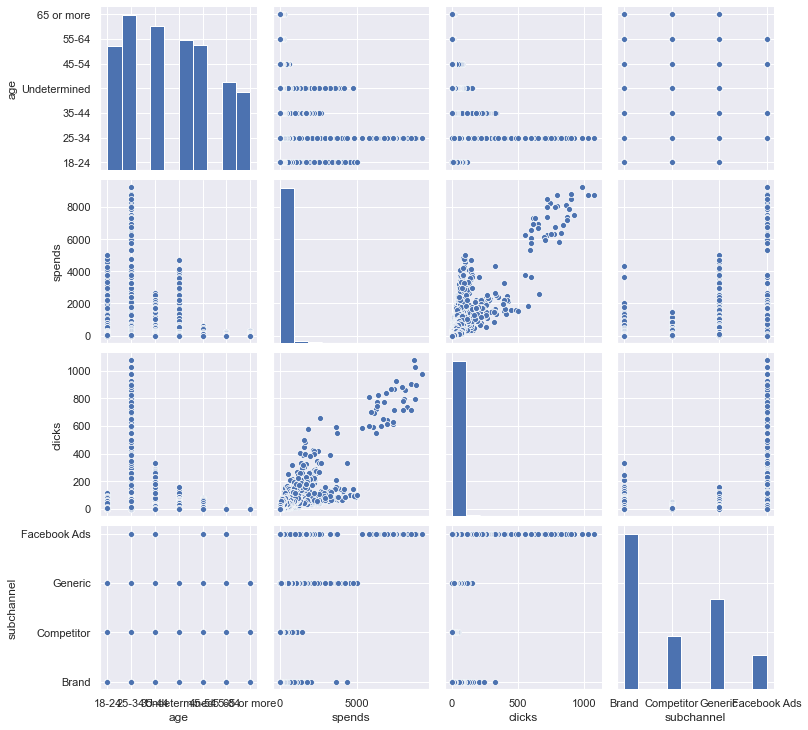

In [124]:
sns.pairplot(data,vars =['age','spends','clicks','subchannel'],palette='husl')

##### Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables.

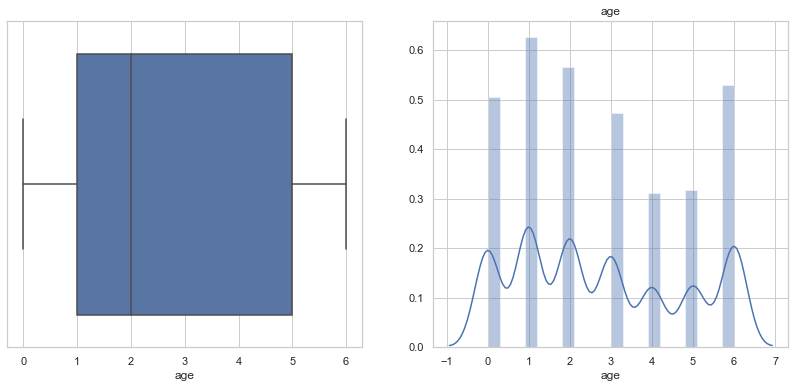

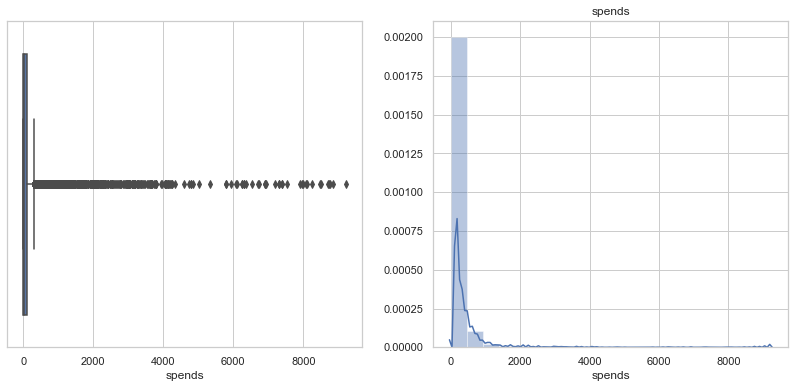

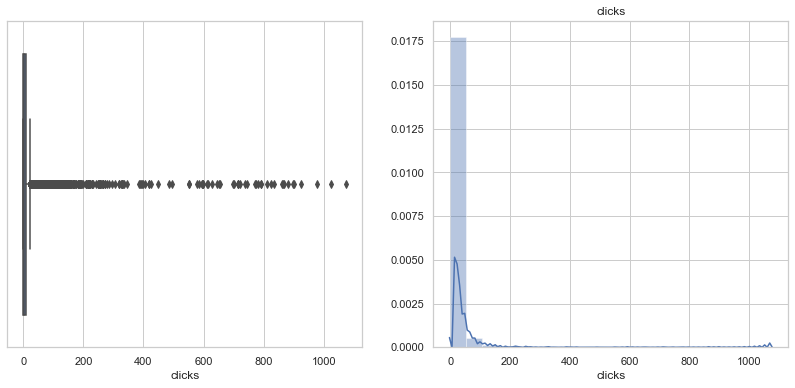

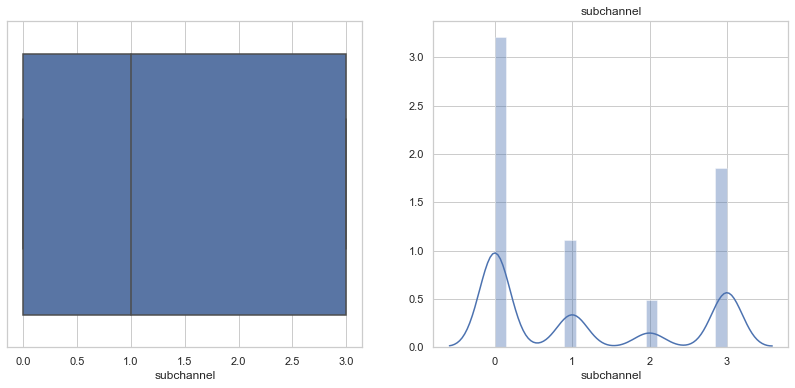

In [180]:
plots=['age','spends','clicks','subchannel']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(data[i])
    plt.subplot(1,2,2)
    sns.distplot(data[i],bins= 20)    
    plt.title(i)    
    plt.show()

In [ ]:
data.isnull().any(axis=1).sum()

### encoding categorical data

In [126]:
data['campaign_type'] = LabelEncoder().fit_transform(data['campaign_type'])
data['creative_name'] = LabelEncoder().fit_transform(data['creative_name'])
data['creative_type'] = LabelEncoder().fit_transform(data['creative_type'])
data['audience_type'] = LabelEncoder().fit_transform(data['audience_type'])
data['age'] = LabelEncoder().fit_transform(data['age'])
data['device'] = LabelEncoder().fit_transform(data['device'])
data['subchannel'] = LabelEncoder().fit_transform(data['subchannel'])
data['communication_medium'] = LabelEncoder().fit_transform(data['communication_medium'])
data['campaign_platform'] = LabelEncoder().fit_transform(data['campaign_platform'])


In [127]:
data=data.dropna()

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16288 entries, 2019-10-16 to 2020-07-07
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_platform     16288 non-null  int32  
 1   campaign_type         16288 non-null  int32  
 2   communication_medium  16288 non-null  int32  
 3   subchannel            16288 non-null  int32  
 4   audience_type         16288 non-null  int32  
 5   creative_type         16288 non-null  int32  
 6   creative_name         16288 non-null  int32  
 7   device                16288 non-null  int32  
 8   age                   16288 non-null  int32  
 9   spends                16288 non-null  float64
 10  impressions           16288 non-null  int64  
 11  clicks                16288 non-null  int64  
 12  link_clicks           16288 non-null  float64
dtypes: float64(2), int32(9), int64(2)
memory usage: 1.2 MB


## data analysis

#### impression per platform (facebook and google ads)
#### platform wise total clicks
#### Capital invested by each platform
#### no. of link_clicks per platform (redirects  to the respective ad page)

In [129]:
print('total impressions per platform')
print((data.groupby(['campaign_platform']).impressions.sum()))


total impressions per platform
campaign_platform
0    4052762
1     776893
Name: impressions, dtype: int64


In [130]:
print("platform wise total clicks")
print((data.groupby(['campaign_platform'])).clicks.sum())

platform wise total clicks
campaign_platform
0     77414
1    124065
Name: clicks, dtype: int64


In [131]:
print('Amount of money spent by each platform  ')
print((data.groupby(['campaign_platform'])).spends.count())

Amount of money spent by each platform  
campaign_platform
0     1187
1    15101
Name: spends, dtype: int64


In [132]:
print('Sum of redirects to the ad page by each platform')
print((data.groupby(['campaign_platform'])).link_clicks.sum())

Sum of redirects to the ad page by each platform
campaign_platform
0    35351.0
1        0.0
Name: link_clicks, dtype: float64


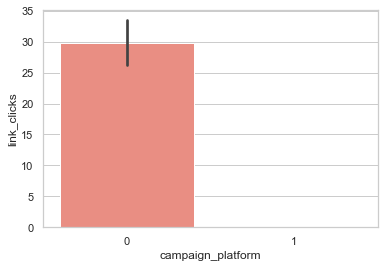

In [133]:
sns.set(style='whitegrid')
ax=sns.barplot(x='campaign_platform',y='link_clicks',data=data,color='salmon')

#### above graph represents there are absolute zero numbers of redirects from google ads

In [134]:
print("age wise link_clicks ")
print((data.groupby(['age']).link_clicks.sum()))

age wise link_clicks 
age
0        0.0
1    26461.0
2     7016.0
3     1812.0
4       62.0
5        0.0
6        0.0
Name: link_clicks, dtype: float64


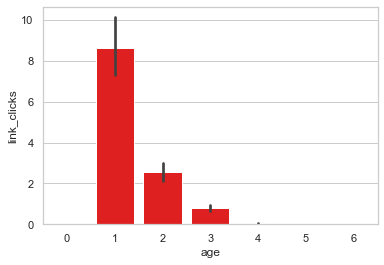

In [135]:
sns.barplot(x='age',y='link_clicks',data=data,color='red')

### observing above we can justify the fact that 25-32 age group are more likely to go the ads page and least being 18-24,65 or more

In [136]:
print('device wise impression total')
print((data.groupby(['device']).clicks.sum()))

device wise impression total
device
0    29276
1    94348
2      441
3    77414
Name: clicks, dtype: int64


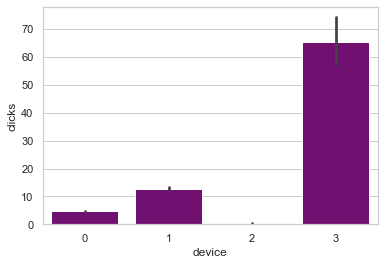

In [137]:
sns.barplot(x='device',y='clicks',data=data,color='purple')

### more no. of mobile users click on ads as compared to other devices 

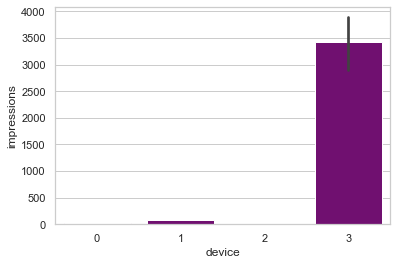

In [138]:
sns.barplot(x='device',y='impressions',data=data,color='purple')

In [139]:
print('total clicks by Subchannel')
print((data.groupby(['subchannel']).clicks.sum()))


total clicks by Subchannel
subchannel
0    69887
1    10451
2    77414
3    43727
Name: clicks, dtype: int64


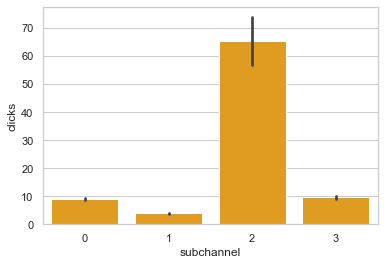

In [140]:
sns.barplot(x='subchannel',y='clicks',data=data,color='orange')

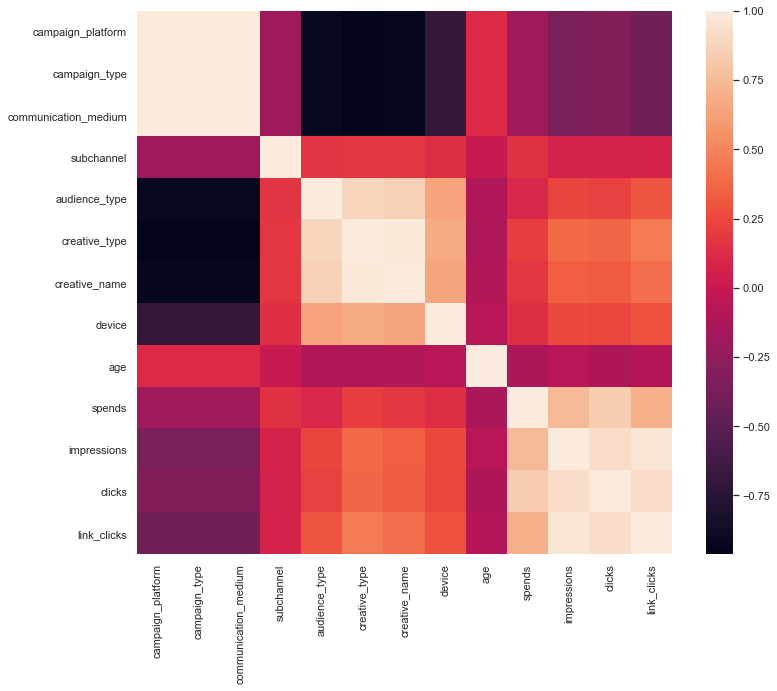

In [141]:
fig= plt.figure(figsize= (12,10))
sns.heatmap(data.corr(),)
## Degree of relatioship i.e correlation using heat map

#### Facebook ads was the most used subchannel in terms of no. of clicks

In [142]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16288 entries, 2019-10-16 to 2020-07-07
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   campaign_platform     16288 non-null  int32  
 1   campaign_type         16288 non-null  int32  
 2   communication_medium  16288 non-null  int32  
 3   subchannel            16288 non-null  int32  
 4   audience_type         16288 non-null  int32  
 5   creative_type         16288 non-null  int32  
 6   creative_name         16288 non-null  int32  
 7   device                16288 non-null  int32  
 8   age                   16288 non-null  int32  
 9   spends                16288 non-null  float64
 10  impressions           16288 non-null  int64  
 11  clicks                16288 non-null  int64  
 12  link_clicks           16288 non-null  float64
dtypes: float64(2), int32(9), int64(2)
memory usage: 1.5 MB


#### Identifying potential Outliers using IQR

In [143]:
numeric_cols = ['spends','impressions','clicks','link_clicks']

In [144]:
from pprint import pprint
for i in numeric_cols:
    stat = data[i].describe()
    pprint(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    16288.000000
mean       153.565088
std        491.194006
min          0.000000
25%          0.000000
50%         25.435000
75%        116.210000
max       9221.960000
Name: spends, dtype: float64
The upper and lower bounds for suspected outliers are 290.525 and -174.315.
count    16288.000000
mean       296.516147
std       2484.608093
min          0.000000
25%          3.000000
50%         13.000000
75%         66.000000
max      67454.000000
Name: impressions, dtype: float64
The upper and lower bounds for suspected outliers are 160.5 and -91.5.
count    16288.000000
mean        12.369781
std         45.489434
min          0.000000
25%          0.000000
50%          2.000000
75%          9.000000
max       1075.000000
Name: clicks, dtype: float64
The upper and lower bounds for suspected outliers are 22.5 and -13.5.
count    16288.000000
mean         2.170371
std         18.659132
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      

### Model building 

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
data.dropna(axis=0)
y=data.clicks
features= ['impressions','spends','age']
X=data[features]

In [174]:
seed =9
test_size=0.33
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [175]:
from sklearn.model_selection import cross_val_score

rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.42307692 0.41025641 0.44179652 0.41063245 0.42804766 0.4335472
 0.42804766 0.4152154  0.4152154  0.42621448]
Mean: 0.4232050106935533
Standard Deviation: 0.009808080138802773


In [176]:
import time
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 41.61
Time consumed for training: 59.474
Time consumed for prediction: 7.94758 seconds


In [177]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 42.84
Time consumed for training: 0.525 seconds
Time consumed for prediction: 0.10110 seconds


In [178]:
from sklearn.tree import DecisionTreeRegressor

new_model= DecisionTreeRegressor(random_state=1 )
new_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [179]:
print("making predictions for the following 5:")
print(X.head())
print("The predictions are")
print(new_model.predict(X.head()))

making predictions for the following 5:
            impressions  spends  age
Date                                
2019-10-16            2    0.00    0
2019-10-16            5    0.00    1
2019-10-16            1    0.00    2
2019-10-16            5   14.63    6
2019-10-18           10   53.31    0
The predictions are
[0. 0. 0. 3. 2.]


In [182]:
!git init


Reinitialized existing Git repository in C:/Users/ADMIN/.git/
